# **ML | Feature Scaling – Part 1**

**Feature Scaling** is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing.


**Working**:
Given a data-set with features- *Age, Salary, BHK Apartment* with the data size of 5000 people, each having these independent data features.

Each data point is labeled as:

* **Class1- YES** (means with the given *Age, Salary, BHK Apartment* feature value one can buy the property)
* **Class2- NO** (means with the given *Age, Salary, BHK Apartment* feature value one can’t buy the property).


Using a dataset to train the model, one aims to build a model that can predict whether one can buy a property or not with given feature values.

Once the model is trained, an N-dimensional (where N is the no. of features present in the dataset) graph with data points from the given dataset, can be created. The figure given below is an ideal representation of the model.  



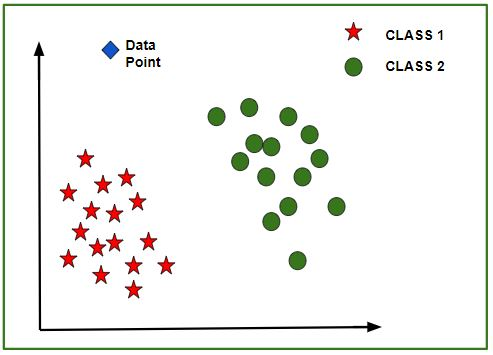

As shown in the figure, star data points belong to **Class1 – Yes** and circles represent **Class2 – No** labels, and the model gets trained using these data points. Now a new data point (diamond as shown in the figure) is given and it has different independent values for the 3 features (*Age, Salary, BHK Apartment*) mentioned above. The model has to predict whether this data point belongs to Yes or No.


**Prediction of the class of new data points**:

The model calculates the distance of this data point from the centroid of each class group. Finally, this data point will belong to that class, which will have a minimum centroid distance from it.
The distance can be calculated between centroid and data point using these methods-



* Euclidean Distance: It is the square root of the sum of squares of differences between the coordinates (feature values – Age, Salary, BHK Apartment) of data point and centroid of each class. This formula is given by the Pythagorean theorem.
image.png
where x is Data Point value, y is Centroid value and k is no. of feature values, Example: given data set has k = 3


* Manhattan Distance: It is calculated as the sum of absolute differences between the coordinates (feature values) of data point and centroid of each class. image.png

* **Minkowski Distance**: It is a generalization of the above two methods. As shown in the figure, different values can be used for finding r.


**Need of Feature Scaling**:

The given data set contains 3 features – *Age, Salary, BHK Apartment*. Consider a range of 10- 60 for *Age*, 1 Lac- 40 Lacs for *Salary*, 1- 5 for *BHK of Flat*. All these features are independent of each other.
Suppose the centroid of class 1 is [40, 22 Lacs, 3] and the data point to be predicted is [57, 33 Lacs, 2].

Using Manhattan Method,

`Distance = (|(40 - 57)| + |(2200000 - 3300000)| + |(3 - 2)|)`

It can be seen that the Salary feature will dominate all other features while predicting the class of the given data point and since all the features are independent of each other i.e. a person’s salary has no relation with his/her age or what requirement of the flat he/she has. This means that the model will always predict wrong.

So, the simple solution to this problem is Feature Scaling. Feature Scaling Algorithms will scale Age, Salary, BHK in a fixed range say [-1, 1] or [0, 1]. And then no feature can dominate others.


# **Feature Engineering: Scaling, Normalization, and Standardization Part 2**

If you are an ML practitioner then you must have come across the term feature scaling which is considered as an unskippable part of the data processing cycle so, that we can achieve stable and fast training of our ML algorithm. In this article, we will learn about different techniques which are used to perform feature scaling in practice.

**What is Feature Scaling?**

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.



**Why use Feature Scaling?**

In machine learning, feature scaling is employed for a number of purposes:

* Scaling guarantees that all features are on a comparable scale and have comparable ranges. This process is known as feature normalisation. This is significant because the magnitude of the features has an impact on many machine learning techniques. Larger scale features may dominate the learning process and have an excessive impact on the outcomes. You can avoid this problem and make sure that each feature contributes equally to the learning process by scaling the features.


* Algorithm performance improvement: When the features are scaled, several machine learning methods, including gradient descent-based algorithms, distance-based algorithms (such k-nearest neighbours), and support vector machines, perform better or converge more quickly. The algorithm’s performance can be enhanced by scaling the features, which can hasten the convergence of the algorithm to the ideal outcome.

* Preventing numerical instability: Numerical instability can be prevented by avoiding significant scale disparities between features. Examples include distance calculations or matrix operations, where having features with radically differing scales can result in numerical overflow or underflow problems. Stable computations are ensured and these issues are mitigated by scaling the features.

* Scaling features makes ensuring that each characteristic is given the same consideration during the learning process. Without scaling, bigger scale features could dominate the learning, producing skewed outcomes. This bias is removed through scaling, which also guarantees that each feature contributes fairly to model predictions.


**Absolute Maximum Scaling**

This method of scaling requires two-step:





1.   We should first select the maximum absolute value out of all the entries of a particular measure.
2.   Then after this, we divide each entry of the column by this maximum value.

image.png


After performing the above-mentioned two steps we will observe that each entry of the column lies in the range of -1 to 1. But this method is not used that often the reason behind this is that it is too sensitive to the outliers. And while dealing with the real-world data presence of outliers is a very common thing.

For the demonstration purpose, we will use the dataset which you can download from [here](https://drive.google.com/file/d/1J7dPhnj2yBuzPwYraFU6cpCsa8Va3fiM/view?usp=share_link). This dataset is a simpler version of the original house price prediction dataset having only two columns from the original dataset. The first five rows of the original data are shown below:



In [ ]:
import pandas as pd
df = pd.read_csv('SampleFile.csv')
print(df.head())

   LotArea  MSSubClass
0     8450          60
1     9600          20
2    11250          60
3     9550          70
4    14260          60


Now let’s apply the first method which is of the absolute maximum scaling. For this first, we are supposed to evaluate the absolute maximum values of the columns.



In [ ]:
import numpy as np
max_vals = np.max(np.abs(df))
max_vals

215245

Now we are supposed to subtract these values from the data and then divide the results from the maximum values as well.

**Min-Max Scaling**

This method of scaling requires below two-step:

1. First, we are supposed to find the minimum and the maximum value of the column.
2. Then we will subtract the minimum value from the entry and divide the result by the difference between the maximum and the minimum value.
image.png

As we are using the maximum and the minimum value this method is also prone to outliers but the range in which the data will range after performing the above two steps is between 0 to 1.




In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data,
                         columns=df.columns)
scaled_df.head()

,LotArea,MSSubClass
0,0.033420,0.235294
1,0.038795,0.000000
2,0.046507,0.235294
3,0.038561,0.294118
4,0.060576,0.235294


**Normalization**

This method is more or less the same as the previous method but here instead of the minimum value, we subtract each entry by the mean value of the whole data and then divide the results by the difference between the minimum and the maximum value.
image.png


In [ ]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data,
                         columns=df.columns)
print(scaled_df.head())

    LotArea  MSSubClass
0  0.999975    0.007100
1  0.999998    0.002083
2  0.999986    0.005333
3  0.999973    0.007330
4  0.999991    0.004208


**Standardization**

1. This method of scaling is basically based on the central tendencies and variance of the data.

2. First, we should calculate the mean and standard deviation of the data we would like to normalize.
Then we are supposed to subtract the mean value from each entry and then divide the result by the standard deviation.

This helps us achieve a normal distribution(if it is already normal but skewed) of the data with a mean equal to zero and a standard deviation equal to 1.

image.png

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data,
                         columns=df.columns)
print(scaled_df.head())

    LotArea  MSSubClass
0 -0.207142    0.073375
1 -0.091886   -0.872563
2  0.073480    0.073375
3 -0.096897    0.309859
4  0.375148    0.073375


**Robust Scaling**

In this method of scaling, we use two main statistical measures of the data.

* Median
* Inter-Quartile Range
After calculating these two values we are supposed to subtract the median from each entry and then divide the result by the interquartile range.
image.png


In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data,
                         columns=df.columns)
print(scaled_df.head())

    LotArea  MSSubClass
0 -0.254076         0.2
1  0.030015        -0.6
2  0.437624         0.2
3  0.017663         0.4
4  1.181201         0.2
